In [1]:
# 107062566 黃鈺程 CVLab, Delta 722
# Dependencies: numpy, pandas, matplotlib, seaborn, sklearn

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [3]:
#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)
data = data._get_numeric_data()

In [4]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
class LogisticRegression(object):
    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, p, y):
        """Calculate loss"""    
        eps = 1e-8
        term0 = y * np.log(p + eps)
        term1 = (1 - y) * np.log(1 - p + eps)
        loss = -(term0 + term1)
        return loss.mean()
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        p = self.activation(self.net_input(X))
        return np.where(p < 0.5, 0, 1)

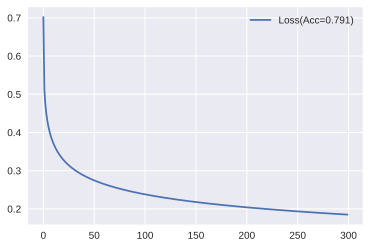

In [6]:
epoch = 300
lr = 1e-3

reg = LogisticRegression(eta=lr, n_epoch=epoch)
reg.fit(X_train_std, y_train)
y_test_pred = reg.predict(X_test_std)
acc = accuracy_score(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(epoch), reg.cost_, label=f'Loss(Acc={acc:.3f})')
ax.legend()
plt.show()

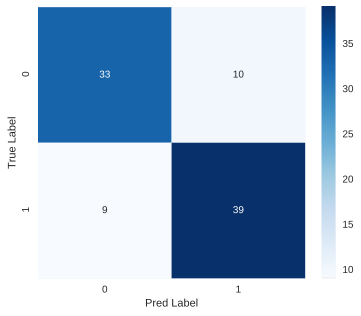

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), cmap=plt.cm.Blues, annot=True, ax=ax)
ax.set_xlabel('Pred Label')
ax.set_ylabel('True Label')
plt.show()

In [8]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.79      0.77      0.78        43
          1       0.80      0.81      0.80        48

avg / total       0.79      0.79      0.79        91

